# Seminar: The Language of Sound: A Journey Through Speech Processing and Multimodality
- Credits: Eleonora Mancini 
- Keywords: Speech Processing, Speech Foundation Models

## Contact

For any doubt, question, issue or help, you can always contact us at the following email addresses:

* Eleonora Mancini -> e.mancini@unibo.it


# Part 1: Generating Spectrogram from Waveform

## Audio Processing with Librosa
In this section, we will use **Librosa** to load an audio file, play it, and visualize the waveform, spectrogram, and mel spectrogram.

Note that the same operations can be performed using **torchaudio**. 


**Steps:**
1. Load the audio file using Librosa.
2. Play the audio.
3. Plot the waveform of the audio.
4. Compute and display the spectrogram.
5. Compute and display the mel spectrogram.

Before proceeding, make sure you have the required libraries installed:

In [2]:
!pip install librosa matplotlib numpy 


In [3]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

### Load an Audio File

In [4]:
audio_path = 'audio_files/hello_sound.wav'  # Replace with your file path
y, sr = librosa.load(audio_path, sr=None)  # y is the audio signal, sr is the sample rate

### Reproduce the Audio

In [5]:
Audio(audio_path)

### Plot the Waveform

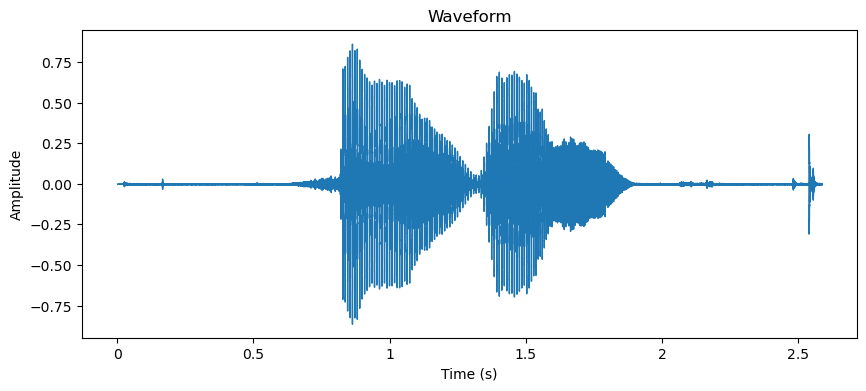

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Compute and Display the Spectrogram
### Understanding the STFT in Librosa

#### Key Concepts:
1. **STFT and Segments**:  
   When computing an STFT, the signal is divided into several short segments, each of length `n_fft`. The FFT is then computed for each segment. To avoid losing information, these segments often overlap, meaning the distance between consecutive segments is typically **less than `n_fft`**. This overlap is controlled by the `hop_length`, which is the number of audio samples between the starts of consecutive FFTs.

2. **Hop Length in Samples**:  
   The `hop_length` is defined in samples. For example:
   - If you have 1000 audio samples and `hop_length` = 100, you get **10 feature frames**.  
   - If `n_fft` > `hop_length`, padding may be applied to ensure all samples are processed.

3. **Frame Rate**:  
   The rate at which feature frames are generated can be calculated as:  
   $$\text{frame\_rate} = \frac{\text{sample\_rate}}{\text{hop\_length}}$$  
   For example, with:
   - `sample_rate` = 22050 Hz  
   - Default `hop_length` = 512  

   The frame rate is:  
   $$\frac{22050}{512} \approx 43 \, \text{frames per second}$$

4. **Output Dimensions**:  
   For an audio clip of 10 seconds at 22050 Hz, the resulting spectrogram will have dimensions of approximately:
   - **Frequency bins**: Defined by the Mel filterbank (e.g., 128 Mel bins).  
   - **Feature frames**: Determined by the audio duration and the `hop_length`.  

   Example:
   - Audio duration = 10s  
   - Sample rate = 22050 Hz  
   - `hop_length` = 512  

   Number of feature frames:  
   $$\text{frames} = \frac{\text{audio\_samples}}{\text{hop\_length}} = \frac{22050 \times 10}{512} \approx 430$$

   Resulting spectrogram dimensions:  
   $$(128, 430)$$  
   where 128 is the number of Mel bins, and 430 is the number of feature frames.  
   Note: **Padding** can slightly alter these dimensions.

---

### With and Without Mel Bins

#### Without Mel Bins:
- **Frequency Representation**:  
  The spectrogram represents the **raw linear frequency scale** directly from the STFT. The number of frequency bins is:  
  $$\text{n\_fft} / 2 + 1$$  
  For example, if \( \text{n\_fft} = 1024 \), there are \( 1024 / 2 + 1 = 513 \) frequency bins.

- **Resolution**:  
  All frequencies are equally spaced, which does not match the logarithmic nature of human hearing. This is suitable for applications requiring precise frequency information, such as **pitch detection** or **music transcription**, but less interpretable for tasks involving human perception.

- **Output Dimensions**:  
  Spectrogram dimensions will be \((\text{n\_fft}/2+1, \text{num\_frames})\), where `num_frames` depends on the audio duration and `hop_length`.

---

#### With Mel Bins:
- **Frequency Representation**:  
  Frequencies are mapped to the **Mel scale**, which is perceptually motivated. Lower frequencies have finer resolution, and higher frequencies are compressed.

- **Reduced Dimensionality**:  
  A Mel filterbank reduces the number of frequency bins to a fixed number (e.g., 128 or 40). This reduces computational complexity and focuses on perceptually relevant features.

- **Output Dimensions**:  
  Spectrogram dimensions become \((\text{num\_mel\_bins}, \text{num\_frames})\), where `num_mel_bins` is user-defined.

- **Applications**:  
  Mel-scaled spectrograms are better suited for tasks like **speech recognition**, **emotion detection**, and other tasks involving human perception.

---




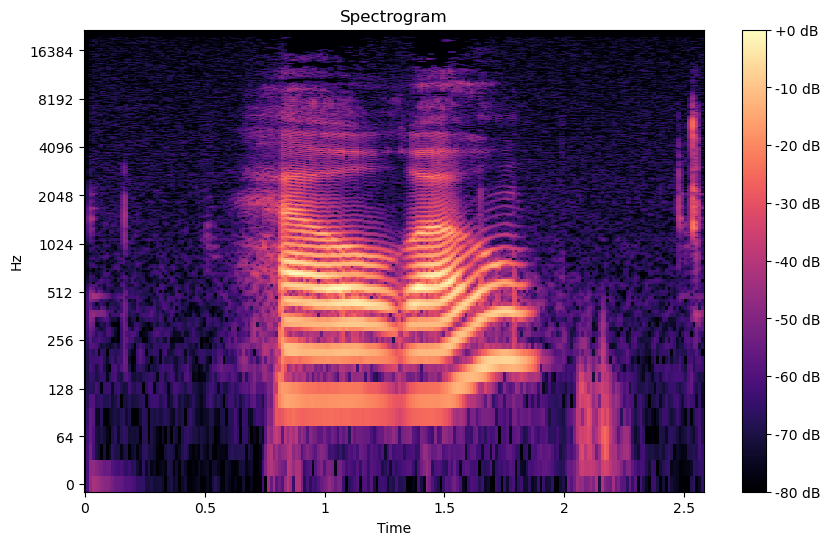

In [7]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  # Compute the STFT and convert to dB

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

### Compute and display the Mel Spectrogram

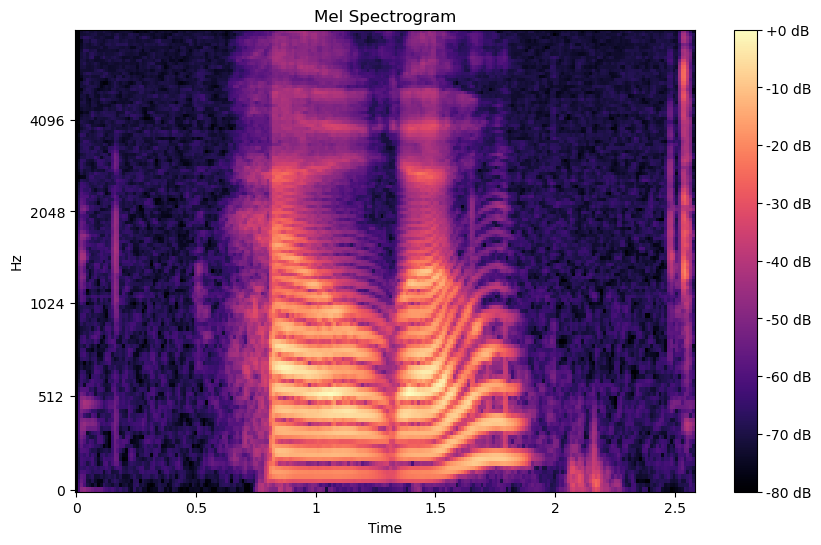

In [9]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)  # Mel spectrogram

# Convert to decibels
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

### Why Do We Need to Perform `AmplitudeToDB`?
In audio signal processing, converting the amplitude of an audio signal into a decibel (dB) scale is a common practice for a few key reasons:

1. **Human Hearing Perception**: The human auditory system perceives sound in a logarithmic manner. This means that we do not perceive differences in sound intensity (loudness) in a linear way. A sound that is 10 times more intense than another is not perceived as 10 times louder. Instead, it is perceived in a more compressed scale. The decibel scale closely matches this perception, making it more intuitive when working with audio data.

2. **Dynamic Range Compression**: Audio signals, especially raw waveforms, often have a wide dynamic range. That is, they contain both very quiet and very loud sections. A signal’s dynamic range can span several orders of magnitude. By converting amplitudes into dB, we compress this range, making it easier to visualize and analyze without losing important details. This is particularly useful for operations like spectrograms, where low-energy components would otherwise be hard to distinguish from noise.

3. **Logarithmic Representation**: The decibel scale is logarithmic, which helps compress very large values and make the differences more noticeable in a manageable range. For instance, very large or very small values (in terms of amplitude) are normalized into a range that is easier to visualize or process. This can help reveal patterns in the data that would be difficult to detect in a purely linear scale.

4. **Standard Practice in Audio Analysis**: Many audio and speech processing algorithms (such as in speech recognition, audio classification, or music information retrieval) are designed to work with logarithmic representations of audio, like spectrograms in decibels. Converting to dB ensures consistency and comparability across various tools, datasets, and research.

### The Process: `AmplitudeToDB` in Detail
When you perform an operation like the Short-Time Fourier Transform (STFT) or Mel-frequency Cepstral Coefficients (MFCCs) on an audio signal, the result is typically a **magnitude spectrogram**. This magnitude is in linear units, representing raw amplitudes.

To convert the raw amplitude spectrogram to a logarithmic scale, we use AmplitudeToDB, which transforms the amplitude values into decibel (dB) values using the formula:

$𝑑𝐵=10×log_{10}(P)$

Where:
- $P$ is the power or amplitude of the signal.
This transformation helps improve the perceptual relevance of the data and aids in better visualization of the frequency content.



### Alternatives to `AmplitudeToDB`

While `AmplitudeToDB` is a widely used and standard method for converting amplitude to decibels (dB), there are several alternative approaches or transformations that can be used depending on the context:


#### **1. Logarithmic Scaling (Without `AmplitudeToDB`)**
You can apply a direct logarithmic transformation to the magnitude spectrogram or waveform. This method typically operates on the **power** of the signal, rather than just the amplitude. For example:

\[
\text{log\_spec} = \log(\text{spec} + \epsilon)
\]

Here, \( \epsilon \) is a small constant added to avoid taking the logarithm of zero.

This approach can approximate decibel scaling but lacks the specific scaling factor (e.g., \( 10 \times \) or \( 20 \times \)) applied by `AmplitudeToDB`. It is less common than using `AmplitudeToDB`, which is specifically designed for audio data.

#### **4. Mel Spectrogram**
Instead of converting to dB after computing the spectrogram, you can directly compute a **Mel spectrogram**. This method applies a non-linear transformation to map frequencies to the Mel scale, which better aligns with human auditory perception.

The Mel spectrogram can also be combined with logarithmic scaling to produce **Mel-frequency cepstral coefficients (MFCCs)**, which are widely used in speech and audio processing tasks.


# Part 2: Accessing and Fine-Tuning Speech Foundation Models with Hugging Face

## 1. Inference Example: using Pre-trained Wav2Vec2 Model
In this section, we will demonstrate how to perform inference using a pre-trained speech model, specifically Wav2Vec2. We will load an audio file, process it, and then use the model to transcribe the speech to text. This will showcase how to quickly leverage powerful models from Hugging Face for automatic speech recognition (ASR) without needing to train the model from scratch.

In [1]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torchaudio
import torch

/home/emancini/miniforge3/envs/nlp-teaching/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load pre-trained Wav2Vec2 model and processor

In [2]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

/home/emancini/miniforge3/envs/nlp-teaching/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/emancini/miniforge3/envs/nlp-teaching/lib/python3.10/site-packages/transformers/modeling_utils.py:463: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unle

### Load and resample audio with PyTorch

To handle audio files that may have a sampling rate different from the one used in the pre-trained Wav2Vec2 model (which was trained on 16 kHz audio), we need to add a resampling step to convert the audio to the correct sampling rate before passing it to the model.

In [25]:
# Function to load audio
def load_and_resample_audio(file_path, target_sample_rate=16000):
    waveform, sample_rate = torchaudio.load(file_path)  # Load audio file
    if sample_rate != target_sample_rate:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resampler(waveform)  # Resample to target sample rate
    return waveform

### Define function to transcribe speech

In [ ]:
def transcribe_audio(waveform):
    # Step 1: Preprocess the waveform (audio) using the processor
    # The processor tokenizes and prepares the input waveform to be fed into the model.
    # It expects the audio to have a sampling rate of 16 kHz and converts the waveform into a tensor.
    # 'padding=True' ensures that the inputs are padded to the correct length.
    inputs = processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True)
    
    # Step 2: Print the shape of the input tensor
    # This prints the shape of the processed audio tensor to see its dimensions before feeding it into the model.
    print(inputs.input_values.shape)
    
    # Step 3: Forward pass through the model
    # With torch.no_grad() to prevent gradients from being calculated (since we are not training the model).
    # This step passes the processed input values through the model to get the logits (raw output scores).
    with torch.no_grad():
        logits = model(input_values=inputs.input_values).logits
        # logits are the unnormalized predictions made by the model.
        # They will be used to generate the final predicted transcription.
        print(logits)
    
    # Step 4: Decode predictions
    # `logits` contain the output predictions of the model. We use `torch.argmax` to get the index of the maximum logit.
    # This gives us the predicted token IDs (word/phoneme IDs) for the input sequence.
    predicted_ids = torch.argmax(logits, dim=-1)  # The 'dim=-1' indicates we are taking the max value across the last dimension.
    
    # Step 5: Convert the predicted token IDs to text
    # The processor.decode function converts the token IDs back into a human-readable transcription (string).
    # Here, we only decode the first (and typically the only) batch in the tensor.
    transcription = processor.decode(predicted_ids[0])
    
    # Step 6: Return the transcription
    return transcription


### Perform inference

In [29]:
file_path = "audio_files/hello_sound.wav"  # Update with your audio file path
waveform, sr = load_and_resample_audio(file_path)
transcription = transcribe_audio(waveform)
print("Transcription:", transcription)

torch.Size([1, 41378])
tensor([[[ 14.1086, -35.0485, -34.8264,  ...,  -6.3099,  -5.3976,  -4.7552],
         [ 14.1498, -35.1884, -34.9588,  ...,  -6.4055,  -5.4838,  -4.8628],
         [ 14.0928, -35.0769, -34.8506,  ...,  -6.3481,  -5.4470,  -4.8172],
         ...,
         [ 14.6751, -36.0131, -35.7536,  ...,  -6.5437,  -5.6139,  -4.6962],
         [ 14.6959, -36.0595, -35.7997,  ...,  -6.5411,  -5.6492,  -4.6915],
         [ 14.6402, -35.8586, -35.6067,  ...,  -6.4622,  -5.5732,  -4.6177]]])
Transcription: HOW WELL


## 2. Use SFMs to Generate Representations: Extracting Embeddings 
In this section, we will demonstrate how to extract embeddings from a pre-trained speech model that can be used for downstream tasks such as speech classification. We will use the Wav2Vec2 model to extract meaningful audio representations (embeddings). These embeddings can be then directly input into a separate classifier for tasks like speaker identification or emotion recognition in speech.

In [44]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch
import torchaudio

In [45]:
# Load pre-trained Wav2Vec2 model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

/home/emancini/miniforge3/envs/nlp-teaching/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/emancini/miniforge3/envs/nlp-teaching/lib/python3.10/site-packages/transformers/modeling_utils.py:463: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unle

In [46]:
# Function to load audio
def load_and_resample_audio(file_path, target_sample_rate=16000):
    waveform, sample_rate = torchaudio.load(file_path)  # Load audio file
    if sample_rate != target_sample_rate:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resampler(waveform)  # Resample to target sample rate
    return waveform

In [52]:
# Function to extract embeddings from the model
def extract_embeddings(inputs):

    # Get embeddings (hidden states) from the model
    with torch.no_grad():
        outputs = model(input_values=inputs, output_hidden_states=True)
    
    # Extract hidden states (embeddings) from the last layer
    hidden_states = outputs.hidden_states[-1]
    embeddings = torch.mean(hidden_states, dim=1)  # Optionally, take the mean of the hidden states for each time step
    return embeddings

In [53]:
# Example usage for embedding extraction
file_path = "audio_files/hello_sound.wav"  # Update with your audio file path
waveform = load_and_resample_audio(file_path)
embeddings = extract_embeddings(waveform)

# Now embeddings can be used as input to a downstream classification model
print("Extracted embeddings:", embeddings.shape)

Extracted embeddings: torch.Size([2, 1024])


# The End!